## Reinforcement Learning

The next and final topic in this course covers Reinforcement Learning. This technique is different than many of the other machine learning techniques we have seen earlier and has many applications in training agents (AI) to interact with environments like games. Rather than feeding our machine learning model millions of examples, we let our model come up with its own examples by exploring an environment. The concept is fairly simple. Humans learn by exploring and learning from mistakes and past experiences so let's have our computer do the same.

## Terminology

-- Environment In reinforcing learning tasks we have a notion of the environment. This is what our agent will explore. An example of an environment in the case of training an AI to play say a game of Mario would be the level we are training the agent on.

-- Agent An agent is an entity that is exploring the environment. Our agent will interact and take different actions within the environment. In our Mario example, the Mario character within the game would be our agent.

-- State at all times our agent will be in what we call a state. The state simply tells us about the status of the agent The most common example of a state is the location of the agent within the environment. Moving locations would change the agent state. 

-- Action any interaction between the agent and environment would be considered an action. For example, moving to the left or jumping would be an action. An action may or may not change the current state of the agent. In fact, the act of doing nothing is actually an action as well.

-- Reward every action that our agent takes will result in a reward of some magnitude (positive or negative). The goal of our agent will be to maximize its reward in an environment. Sometimes the reward will be clear, for example, if an agent performs an action that increases their score in the environment we could say they've received a positive reward. If the agent were to perform an action that results in them losing score or possibly dying in the environment then they would receive a negative reward.


## Q-Learning

Q-Learning is a fairly simple yet quite powerful technique in machine learning that involves learning a matrix of action-reward values. This matrix is often referred to as a Q-Table or Q-Matrix. The matrix is in shape (number of possible states, number of possible actions) where each value at matrix[n,m] represents the agent's expected reward given they are in state n and take action m. The Q-learning algorithm defines the way we update the values in the matrix and decide what action to take at each state. The idea is that after a successful training/learning of this Q-Table/matrix, we can determine the action an agent should take in any state by looking at that state's row in the matrix and taking the maximum value column as the action.

## Q-Learning Example

For this example we will use the Q-Learning algorithm to train an agent to navigate a popular environment from the OpenAI Gym. The Open AI Gym was developed so programmers could practice machine learning using unique environments.

In [1]:
import gym

In [2]:
#loading a environment
env = gym.make('FrozenLake-v1')

In [3]:
print(env.observation_space.n) # get number of states
print(env.action_space.n) # get number of actions 

16
4


In [4]:
env.reset() # result environment to default state 

0

In [5]:
action = env.action_space.sample() # get random action

In [6]:
observation, reward, done, info = env.step(action)

In [7]:
env.render()

## Bulding The Q-Table

In [8]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

In [9]:
Q = np.zeros((STATES, ACTIONS)) # create a matrix with all 0 values
Q

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

## Constants

In [10]:
EPISODES = 10000 # how many times to run the environment from the beginning
MAX_STEPS = 100 # max number of steps allowed for each run of the environment

LEARNING_RATE = 0.81 # learning rate 
GAMMA = 0.96

## Picking an Action

Remember that we can pick an action using one of the two methods:

1. Randomly picking a valid action

2. Using the current Q-Table to find the best action

In [11]:
epslion = 0.9 # start with a 90% chance of picking a random action

# code to pick action
if np.random.uniform(0,1 ) < epslion: # we will check if a randomly selected value is less than epsilon
    action = env.action_space.sample() # take a random action
else:
    action = np.argmax(Q[state, :]) # use the Q table to pick best action based on current values

## Updating Q Values

In [12]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500
MAX_STEPS = 100

LEARNING_RATE = 0.81
GAMMA = 0.96

RENDER = False

epslion = 0.9

In [13]:
rewards = []
for episode in range (EPISODES):
    
    state = env.reset()
    for _ in range (MAX_STEPS):
        
        if RENDER:
            env.render()
        
        if np.random.uniform(0, 1) < epslion:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
            
        next_state, reward, done, _ = env.step(action)
        
        Q[state, action] = Q[state, action] + LEARNING_RATE * (reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action])
        
        state = next_state
        
        if done:
            rewards.append(reward)
            epslion -= 0.001
            break # reached goal
        
print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")

[[3.32182953e-01 1.84905528e-02 1.84604282e-02 1.81193100e-02]
 [2.90244809e-03 8.73070244e-03 9.92279049e-03 1.02762367e-01]
 [7.72823373e-03 1.31843403e-01 5.60710536e-03 7.50516462e-03]
 [3.21735971e-03 4.52077724e-03 3.75943682e-03 1.44972898e-01]
 [4.82509776e-01 1.08234067e-02 4.68813710e-03 6.94308249e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.58857992e-04 1.39287821e-04 1.80173934e-01 1.93899442e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.27643115e-02 4.55562074e-03 1.55925372e-02 6.57717717e-01]
 [8.77480893e-03 6.51549268e-01 1.11720687e-02 3.65755948e-03]
 [8.74809722e-01 2.56691498e-03 1.18523679e-03 9.37703660e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.86169455e-02 2.15379733e-02 7.68652875e-01 2.99643746e-02]
 [1.23385377e-01 9.87030772e-01 1.58706771e-01 1.56878642e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

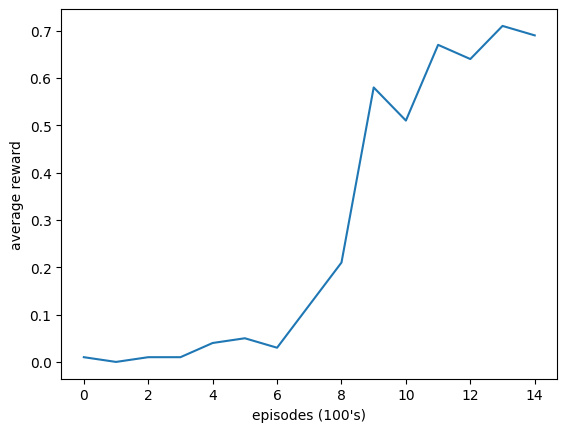

: 

In [14]:
# we can plot the training progres and see how the agent improved 
import matplotlib.pyplot as plt

def get_average(values):
    return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
    avg_rewards.append(get_average(rewards[i:i+100]))
    
plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()